In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
dataset = pd.read_csv("IMDB Dataset.csv")
dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [7]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
dataset["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

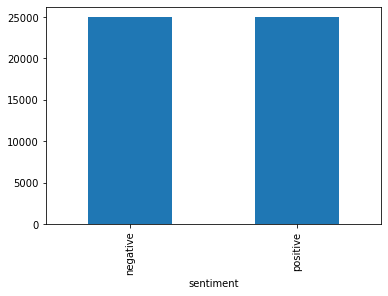

In [10]:
dataset.groupby("sentiment").size().plot(kind='bar')

In [11]:
pos_sent = dataset[dataset["sentiment"] == "positive"]
pos_sent

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
...,...,...
49983,"I loved it, having been a fan of the original ...",positive
49985,Imaginary Heroes is clearly the best film of t...,positive
49989,I got this one a few weeks ago and love it! It...,positive
49992,John Garfield plays a Marine who is blinded by...,positive


In [12]:
from wordcloud import WordCloud, STOPWORDS

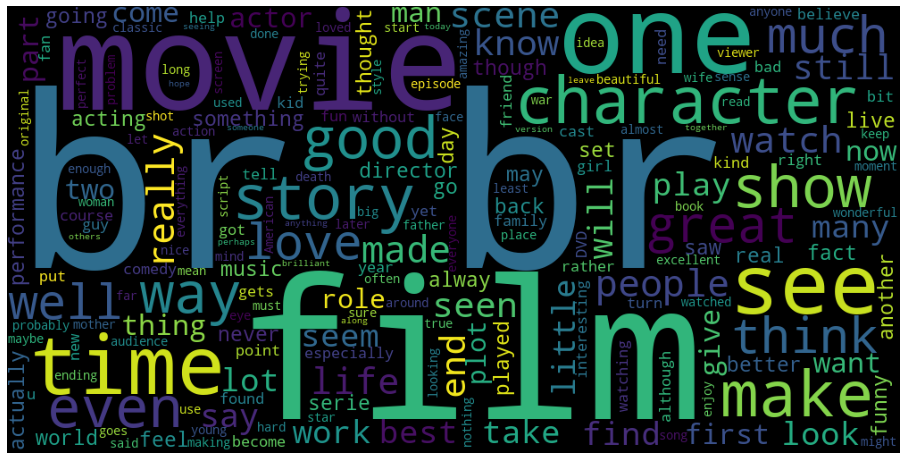

In [13]:
pos_words = " ".join(pos_sent["review"])

pos_cloud = WordCloud(width=1000, height=500).generate(pos_words)
plt.figure(figsize=(16, 10))
plt.imshow(pos_cloud)
plt.axis("off")
plt.show()

In [14]:
neg_sent = dataset[dataset["sentiment"] == "negative"]
neg_sent

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
49994,This is your typical junk comedy.<br /><br />T...,negative
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


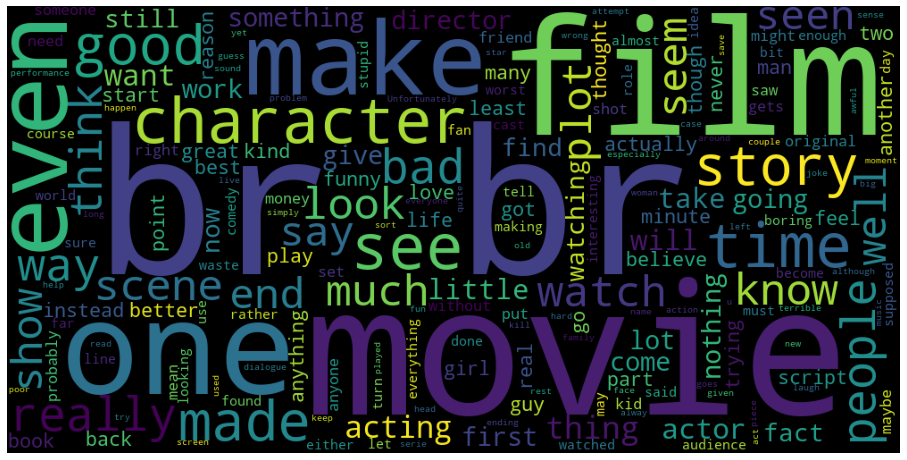

In [15]:
neg_words = " ".join(neg_sent["review"])

neg_cloud = WordCloud(width=1000, height=500).generate(neg_words)
plt.figure(figsize=(16, 10))
plt.imshow(neg_cloud)
plt.axis("off")
plt.show()

In [16]:
dataset["sentiment"] = dataset["sentiment"].replace(to_replace="positive", value=1)
dataset["sentiment"] = dataset["sentiment"].replace(to_replace="negative", value=0)

In [17]:
dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [18]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\MAYANK
[nltk_data]     MONANI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\MAYANK
[nltk_data]     MONANI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
ps=WordNetLemmatizer()
corpus=[]

for i in range(0, 1000):
    reviews=re.sub('[^a-zA-Z]',' ',dataset['review'][i])
    reviews=reviews.lower()
    reviews=reviews.split()
    reviews=[ps.lemmatize(word) for word in reviews if not word in set(stopwords.words('english'))]
    reviews=' '.join(reviews)
    corpus.append(reviews)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 1000)
X = cv.fit_transform(corpus).toarray()

In [21]:
y = dataset.iloc[:1000, [1]].values

In [22]:
y

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/4,random_state=0)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier(n_estimators=400, random_state=0)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

<ipython-input-27-a0ff280fbce5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [29]:
cm_rfc = confusion_matrix(y_test, rfc_pred)
cm_rfc

array([[105,  32],
       [ 13, 100]], dtype=int64)

In [30]:
acc_rfc = accuracy_score(y_test, rfc_pred)
acc_rfc

0.82

In [31]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\MAYANK
[nltk_data]     MONANI\AppData\Roaming\nltk_data...


True

In [32]:
analyser = SentimentIntensityAnalyzer()

In [33]:
def sentiment_check(sentence):
  k = analyser.polarity_scores(sentence)
  return k

In [34]:
str1="Wonder Woman 2 was a really good movie."
sentiment_check(str1)

{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.4927}

In [35]:
dataset['scores']=dataset['review'].apply(lambda x: sentiment_check(x))

In [36]:
import pickle

In [37]:
pickle.dump(cv, open("cv-transform.pkl", "wb"))

In [38]:
filename = "sentiment-analysis-model.pkl"


In [39]:
pickle.dump(rfc, open(filename, "wb"))